In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [41]:
# Load the dataset
data = pd.read_csv('../data/data.csv')

In [42]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')

In [43]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0,NaN


In [44]:
population_2020 = data[['Country Name', '2020']].copy()

In [45]:
population_2020.replace([np.inf, -np.inf], np.nan, inplace=True)
population_2020.dropna(subset=['2020'], inplace=True)

In [46]:
population_2020.columns = ['Country', 'Population']

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


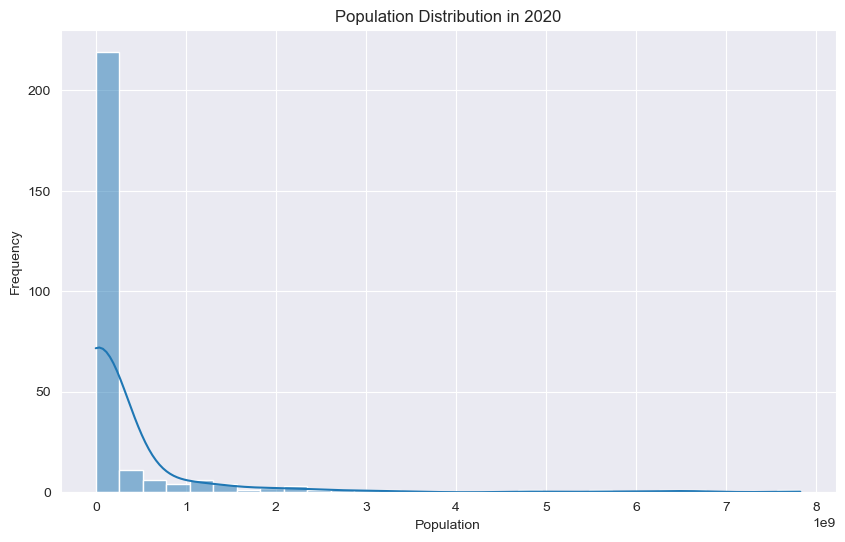

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(population_2020['Population'], bins=30, kde=True)
plt.title('Population Distribution in 2020')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('../images/population_distribution_2020.png')
plt.show()

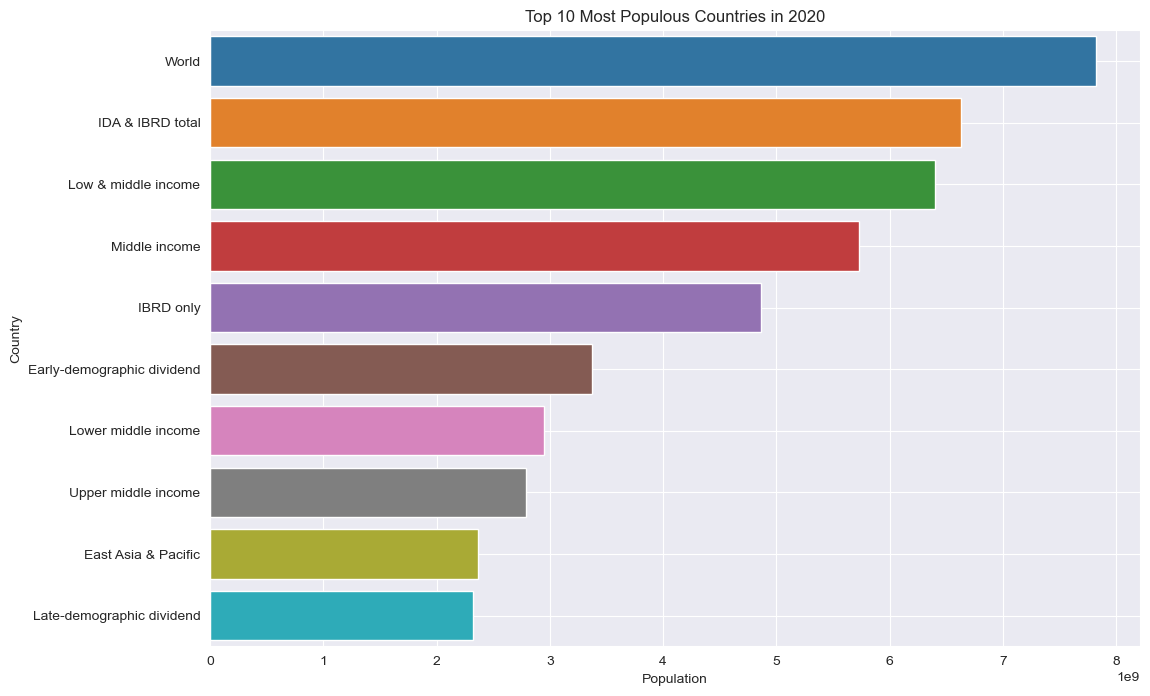

In [53]:

top_10_countries = population_2020.nlargest(10, 'Population')

plt.figure(figsize=(12, 8))
sns.barplot(x='Population', y='Country', data=top_10_countries)
plt.title('Top 10 Most Populous Countries in 2020')
plt.xlabel('Population')
plt.ylabel('Country')
plt.grid(True)
plt.savefig('../images/top_10_countries_2020.png')
plt.show()

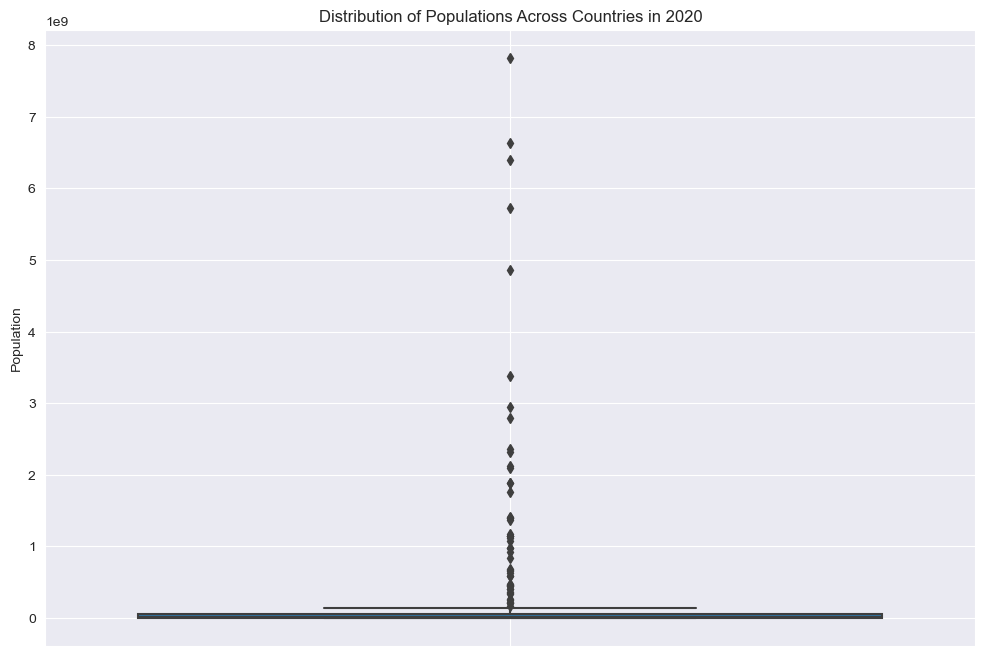

In [54]:

plt.figure(figsize=(12, 8))
sns.boxplot(y='Population', data=population_2020)
plt.title('Distribution of Populations Across Countries in 2020')
plt.ylabel('Population')
plt.grid(True)


plt.savefig('../images/population_distribution_boxplot.png')
plt.show()

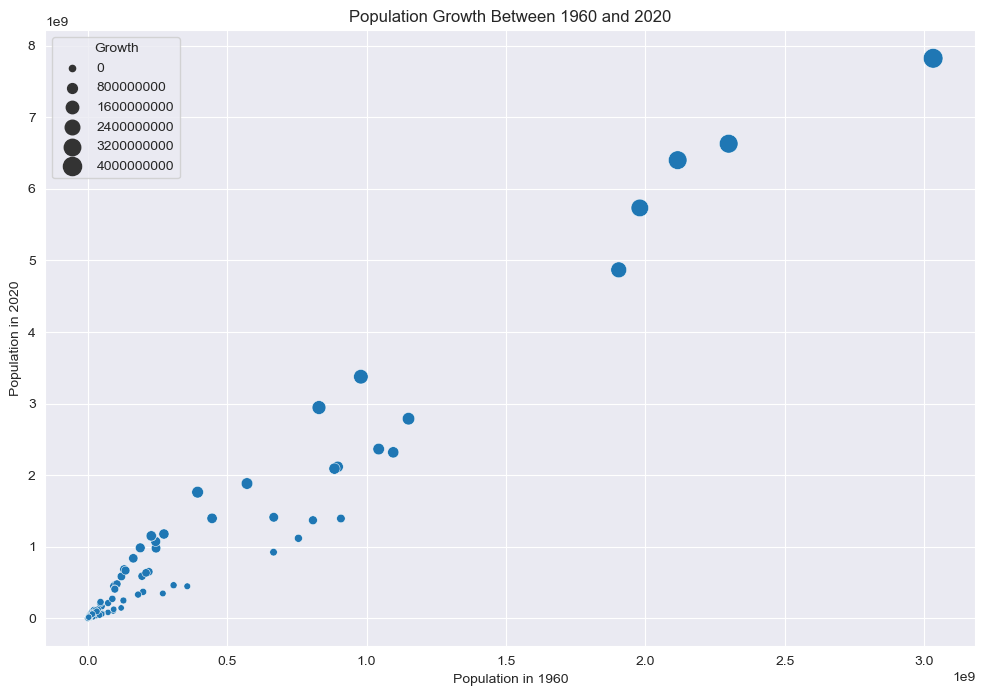

In [55]:

population_growth = data[['Country Name', '1960', '2020']].copy()
population_growth['Growth'] = population_growth['2020'] - population_growth['1960']
population_growth.dropna(inplace=True)
population_growth.columns = ['Country', 'Population_1960', 'Population_2020', 'Growth']
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Population_1960', y='Population_2020', size='Growth', data=population_growth, sizes=(20, 200))
plt.title('Population Growth Between 1960 and 2020')
plt.xlabel('Population in 1960')
plt.ylabel('Population in 2020')
plt.grid(True)
plt.savefig('../images/population_growth_scatterplot.png')
plt.show()